In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
f = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\Geron2\datasets\titanic'

In [3]:
# set pandas display options to show full table
def set_pandas_display_options() -> None:
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [4]:
try:
    train = pd.read_csv(os.path.join(f,'train.csv'), index_col='PassengerId')
    test = pd.read_csv(os.path.join(f,'test.csv'), index_col='PassengerId')
except:
    train = pd.read_csv(os.path.join('data','train.csv'), index_col='PassengerId')
    test = pd.read_csv(os.path.join('data','test.csv'), index_col='PassengerId')
print(train.shape,test.shape)

(891, 11) (418, 10)


The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: C = Cherbourg, Q = Queenstown, S = Southampton

## 1. Data Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Cols having missing values: *Age, cabin, and Embarked***

<br>

In [6]:
# check if classes are evenly distributed
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
# investigate age missing rows
train[(train.Age.isna()) & (train.Pclass==3)].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S


**Conclusion: no evidence of missing age due to child-fare**

<br>

In [8]:
train.pivot_table('Name',columns='Sex',index='Survived',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [9]:
train.pivot_table('Name',columns='Embarked',index='Survived',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [10]:
# explore.Ticket.value_counts()

In [11]:
# explore.Ticket.astype(str)

In [12]:
# explore[explore.Ticket.str.len()<7].sort_values(by='Ticket')

In [13]:
train['Fare_int'] = train.Fare.round(-1)
test['Fare_int'] = test.Fare.round(-1)
train.pivot_table('Name',columns='Fare_int',index='Survived',aggfunc='count')

Fare_int,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,110.0,120.0,130.0,140.0,150.0,160.0,210.0,220.0,230.0,250.0,260.0,510.0
Survived,,,,,,,,,,,,,,,,,,,,,,
0,16.0,327.0,54.0,76.0,16.0,17.0,6.0,14.0,8.0,1.0,4.0,NaN,NaN,1.0,3.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN
1,1.0,113.0,46.0,59.0,12.0,13.0,19.0,5.0,23.0,12.0,7.0,4.0,4.0,2.0,6.0,2.0,3.0,NaN,3.0,1.0,4.0,3.0


In [14]:
train.pivot_table('Age',index='Survived',aggfunc='mean')

,Age
Survived,
0,30.626179
1,28.343690


In [15]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_int
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,33.01908
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,49.25032
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,10.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,10.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.00000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,510.00000


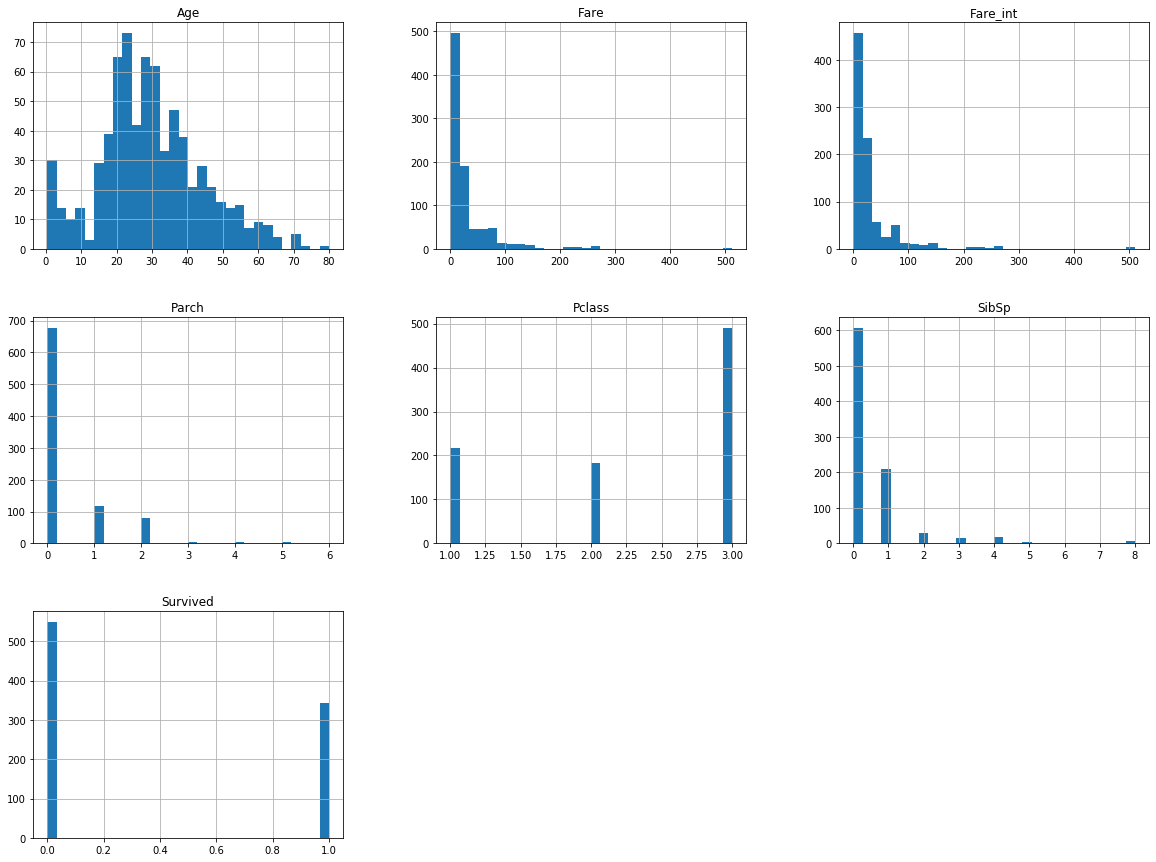

In [16]:
train.hist(bins=30,figsize=(20,15))
plt.show()

## 2. Feature Engineering 

>**1. process name, sex, and age**

In [17]:
# examine names
noble = ['Duke.','Duchess.','Marquess.','Marchioness.','Lord.','Lady.','Earl.','Countess.','Honourable.',
    'Viscount','Viscountess','Baron','Baroness','Knight.']
Ms = ['Mrs.', 'Miss.']

train['Noble'] = train['Name'].str.contains('|'.join(noble))
test['Noble'] = test['Name'].str.contains('|'.join(noble))

In [18]:
train.pivot_table('Name',columns='Noble',index='Survived',aggfunc='count')

Noble,False,True
Survived,,
0,548,1
1,340,2


**Noble not worth it**

In [19]:
# combine sex and age features
bins = [0,16,60,120]
group_names = ['Young','Adult','Senior']
train.loc[:,'Age_Group'] = pd.cut(train.Age, bins, labels=group_names)
train.loc[:,'Sex-Age'] = train['Sex'] + train['Age_Group'].astype(str)

test.loc[:,'Age_Group'] = pd.cut(test.Age, bins, labels=group_names)
test.loc[:,'Sex-Age'] = test['Sex'] + test['Age_Group'].astype(str)

> **2. Mean encoding**

> 2.1 Cross Validation Regularizatoin

In [20]:
train.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
Fare_int       0
Noble          0
Age_Group    177
Sex-Age        0
dtype: int64

**only `Embarked` is fit for mean encoding**

In [21]:
train['Cabin1'] = train.Cabin.str[0]
test['Cabin1'] = test.Cabin.str[0]

In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=12, shuffle=True)

me_feats = ['Embarked','Cabin1','Sex','Sex-Age']

def make_mean_encoding(df, label, me_feats):
    for col in me_feats:
        df[col+'_me'] = df.groupby(col)[label].transform('mean')
        df[col+'_me'].fillna(df[label].mean(), inplace=True)

In [23]:
make_mean_encoding(train, 'Survived', me_feats)

In [24]:
print('CORR: ', np.corrcoef(train['Survived'].values, train['Embarked_me'].values)[0][1].round(2))
train['Embarked_me'].unique()

CORR:  0.17


array([0.33695652, 0.55357143, 0.38961039, 0.38383838])

In [25]:
print('CORR:', np.corrcoef(train['Survived'].values, train['Cabin1_me'].values)[0][1].round(2))
train['Cabin1_me'].unique()

CORR: 0.33


array([0.38383838, 0.59322034, 0.75      , 0.5       , 0.75757576,
       0.46666667, 0.74468085, 0.61538462, 0.        ])

In [26]:
print('CORR:', np.corrcoef(train['Survived'].values, train['Sex_me'].values)[0][1].round(2))
train['Sex_me'].unique()

CORR: 0.54


array([0.18890815, 0.74203822])

> **2.2 Regularize using KFold**

In [27]:
for col in me_feats:
    train[col+'_me_cv'] = 0
    for train_index, val_index in kf.split(train): # use cross-val index to reduce encoding results' correlation with target
        train_train, train_val = train.iloc[train_index], train.iloc[val_index]
        mean = train_val[col].map(train_train.groupby(col)['Survived'].mean())
        train.iloc[val_index, train.columns.get_loc(col+'_me_cv')] = mean
        train[col+'_me_cv'].fillna(train['Survived'].mean(), inplace=True)

In [28]:
print('CORR: ', np.corrcoef(train['Survived'].values, train['Embarked_me_cv'].values)[0][1].round(2))
train['Embarked_me_cv'].unique()

CORR:  0.13


array([0.36170213, 0.52671756, 0.32156863, 0.32239382, 0.33846154,
       0.45762712, 0.34050881, 0.40625   , 0.54545455, 0.39344262,
       0.56934307, 0.33333333, 0.53787879, 0.58571429, 0.38383838,
       0.36065574])

In [29]:
print('CORR:', np.corrcoef(train['Survived'].values, train['Cabin1_me_cv'].values)[0][1].round(2))
train['Cabin1_me_cv'].unique()

CORR: 0.3


array([0.38383838, 0.55555556, 0.58536585, 0.80769231, 0.5       ,
       0.77777778, 0.42857143, 0.73684211, 0.7027027 , 0.60869565,
       0.78378378, 0.66666667, 0.76      , 0.46153846, 0.7826087 ,
       0.62      , 0.74358974, 0.6       , 0.54545455, 0.75675676,
       0.70833333, 0.72413793, 0.75      , 0.73333333, 0.33333333,
       0.58333333, 0.78571429])

In [30]:
print('CORR:', np.corrcoef(train['Survived'].values, train['Sex_me_cv'].values)[0][1].round(2))
train['Sex_me_cv'].unique()

CORR: 0.54


array([0.18763797, 0.76153846, 0.72289157, 0.74380165, 0.19256018,
       0.74297189, 0.19396552, 0.73828125, 0.17659574])

In [31]:
print('CORR:', np.corrcoef(train['Survived'].values, train['Sex-Age_me_cv'].values)[0][1].round(2))
train['Sex-Age_me_cv'].unique()

CORR: 0.54


array([0.17056856, 0.78488372, 0.75776398, 0.75301205, 0.18456376,
       0.13402062, 0.41860465, 0.73809524, 0.67567568, 0.78571429,
       0.45      , 0.14423077, 0.69767442, 0.17363344, 0.64864865,
       0.12903226, 0.63414634, 0.09708738, 0.18789809, 0.13333333,
       0.76923077, 0.4047619 , 0.        , 0.18387097, 0.66666667,
       0.63043478, 0.14285714, 0.14141414, 0.46153846, 0.425     ,
       0.38383838, 0.6744186 , 0.11764706])

*conlusion: CV helps reduce on correlation slightly, but more so for weak-correlated features than strong one*

> **2.3 Regularize using Expanding mean**

In [32]:
for feature in me_feats:
    cum_sum = train.groupby(feature)['Survived'].cumsum() - train['Survived']
    cum_count = train.groupby(feature).cumcount()

    train[feature + '_me_expmean'] = cum_sum / cum_count
    train[feature + '_me_expmean'].fillna(train['Survived'].mean(), inplace=True)

In [33]:
for feat in me_feats:
    # fill the first value with median
    train[feat+'_me_expmean'].replace([np.inf,-np.inf], train[feat+'_me_expmean'].median(), inplace=True)
    # calculate the correlation
    print('CORR of ', feat, ' with target is: ', 
          np.corrcoef(train['Survived'].values, train[feat+'_me_expmean'].values)[0][1].round(2))

CORR of  Embarked  with target is:  0.04
CORR of  Cabin1  with target is:  0.29
CORR of  Sex  with target is:  0.54
CORR of  Sex-Age  with target is:  0.54


*conlusion: Expanding Mean is more effective than CV on correlation reduction*

> ##### mean Encode for testing

In [34]:
# Create mean encoding for testing set using CV
from sklearn import base

class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,orig_cols,enc_cols):
        
        self.train = train
        self.orig_cols = orig_cols
        self.enc_cols = enc_cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        assert(isinstance(self.orig_cols,list))
        assert(isinstance(self.enc_cols,list))
        enc_cols_lis = []
        for orig_col, enc_col in zip(self.orig_cols, self.enc_cols):
            mean =  self.train.groupby(orig_col)[enc_col].mean()
            X[enc_col] = X[orig_col].map(mean)
        enc_cols_lis.append(X)
        return pd.concat(enc_cols_lis,axis=1)

In [35]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_int,Noble,Age_Group,Sex-Age,Cabin1,Embarked_me,Cabin1_me,Sex_me,Sex-Age_me,Embarked_me_cv,Cabin1_me_cv,Sex_me_cv,Sex-Age_me_cv,Embarked_me_expmean,Cabin1_me_expmean,Sex_me_expmean,Sex-Age_me_expmean
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,10.0,False,Adult,maleAdult,NaN,0.336957,0.383838,0.188908,0.180157,0.361702,0.383838,0.187638,0.170569,0.383838,0.005405,0.383838,0.383838
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,70.0,False,Adult,femaleAdult,C,0.553571,0.593220,0.742038,0.770335,0.526718,0.555556,0.761538,0.784884,0.383838,0.383838,0.383838,0.383838


In [36]:
set(train.columns) - set(test.columns)

{'Cabin1_me',
 'Cabin1_me_cv',
 'Cabin1_me_expmean',
 'Embarked_me',
 'Embarked_me_cv',
 'Embarked_me_expmean',
 'Sex-Age_me',
 'Sex-Age_me_cv',
 'Sex-Age_me_expmean',
 'Sex_me',
 'Sex_me_cv',
 'Sex_me_expmean',
 'Survived'}

In [37]:
test_me_feats = [feat + '_me_cv' for feat in me_feats]

test_enc_model = KFoldTargetEncoderTest(train,me_feats,test_me_feats)
test_enc_feats = test_enc_model.fit_transform(test)

> **3. KNN encoding**

In [246]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors # Unsupervised learner for implementing neighbor searches

class NearestNeighborsFeats(BaseEstimator, ClassifierMixin):
    '''
        This class should implement KNN features extraction,
        The to-be-fitted data cannot contail null values, and must be normalized
    '''
    def __init__(self, n_jobs, k_list, metric, n_classes=None, n_neighbors=None, eps=1e-6):
        self.n_jobs = n_jobs
        self.k_list = k_list # list of K_neighbors candidates, e.g.: [2,3,4,5,...]
        self.metric = metric
        
        if n_neighbors is None:
            self.n_neighbors = max(k_list) 
        else:
            self.n_neighbors = n_neighbors
            
        self.eps = eps        
        self.n_classes_ = n_classes
    
    def fit(self, X, y):
        '''
            Set up the train set and self.NN object
        '''
        # Create a NearestNeighbors (NN) object. We will use it in `predict` function 
        self.NN = NearestNeighbors(n_neighbors=max(self.k_list), 
                                      metric=self.metric, 
                                      n_jobs=1, 
                                      algorithm='brute' if self.metric=='cosine' else 'auto')
        self.NN.fit(X)
        
        # Store labels 
        self.y_train = y
        
        # Save how many target classes we have
        self.n_classes = np.unique(y).shape[0] if self.n_classes_ is None else self.n_classes_
        
        
    def predict(self, X):       
        '''
            Produces KNN features for every instance of X
        '''
        test_feats = []
        
        if self.n_jobs == 1:
            cols = self.get_features_for_one(X[:1])[1]
            for i in range(X.shape[0]): # iterate through all instances
                test_feats.append(self.get_features_for_one(X[i:i+1])[0])
                
        else:
            from multiprocessing import Pool
            import os
            if __name__ == '__main__':
                with Pool(processes=self.n_jobs) as pool:
                    # evaluate "f(X)" asynchronously
                    res = pool.apply_async(self.get_features_for_one, X.shape[0])      # runs in *only* one process
                    print(res.get(timeout=1))             # prints "400"

                    # evaluate "os.getpid()" asynchronously
                    res = pool.apply_async(os.getpid, ()) # runs in *only* one process
                    print(res.get(timeout=1))             # prints the PID of that process

                    # launching multiple evaluations asynchronously *may* use more processes
                    multiple_results = [pool.apply_async(os.getpid, ()) for i in range(self.n_jobs)]
                    print([res.get(timeout=1) for res in multiple_results])

                    # make a single worker sleep for 10 secs
                    res = pool.apply_async(time.sleep, (10,))
                    try:
                        print(res.get(timeout=1))
                        results = [pool.apply(self.get_features_for_one, args=(X[i:i+1],))[0] for i in range(X.shape[0])]
                        test_feats.append(results)
                    except TimeoutError:
                        print("We lacked patience and got a multiprocessing.TimeoutError")
                    
            
        return pd.DataFrame(np.vstack(test_feats), columns = cols)
        
        
    def get_features_for_one(self, x):
        '''
            Computes KNN features for a single instance `x`
        '''

        NN_output = self.NN.kneighbors(x)
        
        # Vector of size `n_neighbors`
        # Stores indices of the neighbors
        neighs = NN_output[1][0]
        
        # Vector of size `n_neighbors`
        # Stores distances to corresponding neighbors
        neighs_dist = NN_output[0][0] 

        # Vector of size `n_neighbors`
        # Stores labels of corresponding neighbors
        
        # stores the labels of corresponding neighbors
        neighs_y = np.array(self.y_train)[neighs]
#         import pdb; pdb.set_trace()
    
        # Eventually it will be a list of lists or np.arrays
        # and we will use np.hstack to concatenate those
        return_list = [] 
        colname_list = []
        
        
        ''' 
            1. Fraction of instances of every class.
               It is basically a KNNСlassifiers predictions.
        '''
        for k in self.k_list:
            # YOUR CODE GOES HERE
            label_counts = np.bincount(neighs_y[:k], minlength=self.n_classes) # e.g. 5_neighs, 3 are label_0, 2 are label_1 
            feats = label_counts/label_counts.sum()
            
            assert len(feats) == self.n_classes
            return_list += [feats]
            for c in range(self.n_classes):
                colname = str(k) + 'NN_Class' + str(c)
                colname_list.append(colname)
                
        
        '''
            2. Same label streak: the largest number N, 
               such that N nearest neighbors have the same label.
        '''
        feats =  np.where(np.unique(neighs_y).size==1, neighs_y.size, np.argmin(np.array(neighs_y[:-1]==neighs_y[1:])) + 1)
 
        assert feats.size == 1
        return_list += [feats]
        colname_list.append('Same_Label_Streak')
        
        
        '''
            3. Distances to closest instance of each class
               Find the first instance of each class and take its distance as features.
               
               Distance = 999 if no neighboring instance of the some class, 
        '''
        feats = []
        for c in range(self.n_classes):
            dis_array = neighs_dist[np.where(neighs_y==c)]
            dis = 999 if dis_array.size==0 else dis_array[0] 
            feats.append(dis)
            colname = 'Class' + str(c) + '_Min_Dist'
            colname_list.append(colname)
            
        assert len(feats) == self.n_classes
        return_list += [feats]
        
        
        '''
            4. Minimum *normalized* distance to objects of each class
               As 3. but we normalize (divide) the distances
               by the distance to the closest neighbor.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.
        '''
        feats = []
        for c in range(self.n_classes):
            dis_array = neighs_dist[np.where(neighs_y==c)]
            dis = 999 if dis_array.size==0 else dis_array[0] / (neighs_dist[0] + self.eps)
            feats.append(dis)
            colname = 'Norm_Class' + str(c) + '_Min_Dist'
            colname_list.append(colname)
            
        assert len(feats) == self.n_classes
        return_list += [feats]
        
    
        '''
            5. 
               5.1 Distance to Kth neighbor
                   Think of this as of quantiles of a distribution
               5.2 Distance to Kth neighbor normalized by 
                   distance to the first neighbor

        '''
        for k in self.k_list:
            feat_51 = neighs_dist[k-1]
            colname_51 = 'Dist_to_Neighbor_' + str(k)
            feat_52 = neighs_dist[k-1] / (neighs_dist[0] + self.eps) # YOUR CODE GOES HERE
            colname_52 = 'Norm_Dist_to_Neighbor_' + str(k)
            
            return_list += [[feat_51, feat_52]]
            colname_list += [colname_51, colname_52]
        
        
        '''
            6. Mean distance to neighbors of each class for each K from `k_list` 
               For each class select the neighbors of that class among K nearest neighbors 
               and compute the average distance to those instances
                   
               If there are no objects of a certain class among K neighbors, set mean distance to 999
        '''
        for k in self.k_list:
            mean_dist = np.bincount(neighs_y[:k], weights=neighs_dist[:k], minlength=self.n_classes) \
                    / (np.bincount(neighs_y[:k], minlength=self.n_classes) + self.eps)
            feats = np.where(mean_dist==0, 999, mean_dist)
            
            assert len(feats) == self.n_classes
            return_list += [feats]
            
            for c in range(self.n_classes):
                colname = str(k) + 'NN_Class' + str(c) + '_Mean_Dist'
                colname_list.append(colname)
        
        # merge
        knn_feats = np.hstack(return_list)

#         return pd.DataFrame(knn_feats, columns = colname_list.tolist())
        return knn_feats, colname_list

In [319]:
X, y = train.drop('Survived',axis=1), train['Survived']
knn_cols = ['SibSp','Parch','Fare','Sex-Age_me_cv','Embarked_me_cv'] # non-null numeric value

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_nnf = scaler.fit_transform(X[knn_cols], y)

In [253]:
# Create instance of our KNN feature extractor
NNF = NearestNeighborsFeats(n_jobs=1, k_list=[3,4,5], metric='minkowski')

# Fit on train set
NNF.fit(X_nnf, y)

# Get features for test
knn_feats = NNF.predict(X_nnf)
knn_feats.set_index(X.index, inplace=True)

> get the KNN features for test

In [324]:
X_test_nnf = test_enc_feats[knn_cols]
X_test_nnf.isna().sum()

SibSp             0
Parch             0
Fare              1
Sex-Age_me_cv     0
Embarked_me_cv    0
dtype: int64

In [325]:
X_test_nnf_nonull = X_test_nnf.fillna(method='ffill',axis=1)
X_test_nnf_scaled = scaler.transform(X_test_nnf_nonull)
X_test_nnf_final = NNF.predict(X_test_nnf_scaled)
X_test_nnf_final.set_index(X_test_nnf.index, inplace=True)
X_test_nnf.shape, X_test_nnf_scaled.shape, X_test_nnf_final.shape

((418, 5), (418, 5), (418, 23))

> 3. select features for training

In [326]:
X_cols_keep = ['Pclass','Age','SibSp','Parch','Fare','Embarked_me_cv','Cabin1_me_cv','Sex_me_cv']
X = train[X_cols_keep]
X_test = test[X_cols_keep]

X_MeanEnc_KnnFeats = pd.concat([X,knn_feats], axis=1)
X_test_MeanEnc_KnnFeats = pd.concat([X_test,X_test_nnf_final], axis=1)
X.shape, X_MeanEnc_KnnFeats.shape, X_test.shape, X_test_MeanEnc_KnnFeats.shape

((891, 8), (891, 31), (418, 8), (418, 31))

> 4. get the same encoding features for testing

In [272]:
X_test = test[X_cols_keep]

X_test_MeanEnc_KnnFeats = pd.concat([X_test,X_test_nnf_final], axis=1)
X_test.shape, X_test_MeanEnc_KnnFeats.shape

((418, 8), (418, 31))

## 3. Training with GB Tree

In [273]:
import xgboost
xgb_clf = xgboost.XGBClassifier()

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_MeanEnc_KnnFeats, y, test_size=0.2, random_state=15)
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)

from sklearn.metrics import accuracy_score
accuracy_score(xgb_clf.predict(X_val), y_val).round(4)

[0]	validation_0-error:0.06704
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.07263
[2]	validation_0-error:0.06145
[3]	validation_0-error:0.06704
[4]	validation_0-error:0.05587
[5]	validation_0-error:0.06145
[6]	validation_0-error:0.06145
[7]	validation_0-error:0.05587
[8]	validation_0-error:0.05587
Stopping. Best iteration:
[4]	validation_0-error:0.05587



0.9441

In [274]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
            'max_depth': [3,4,5],
            'learning_rate':stats.reciprocal(0.005, 0.5),
            'n_estimators':stats.randint(20, 230),
            'gamma':[0, 0.5 ,1]
         }

random_tree = RandomizedSearchCV(xgb_clf, n_jobs=-1, param_distributions=xgb_params, 
                                 n_iter=300, cv=3, random_state=10)

random_tree.fit(X_MeanEnc_KnnFeats, y)
print(random_tree.best_score_.round(4))
random_tree.best_params_

0.9551


{'gamma': 1,
 'learning_rate': 0.007510167663582358,
 'max_depth': 3,
 'n_estimators': 135}

In [275]:
random_tree.best_estimator_.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
y_val_hat = random_tree.best_estimator_.predict(X_val)
accuracy_score(y_val_hat, y_val).round(4)

[0]	validation_0-error:0.05028
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.05028
[2]	validation_0-error:0.05028
[3]	validation_0-error:0.05028
[4]	validation_0-error:0.05028
Stopping. Best iteration:
[0]	validation_0-error:0.05028



0.9497

## 4. Examine Errors

#### 4.1 Examined mislabelled val data

In [284]:
# false positive
FP_idx = y_val[(y_val_hat == 1)&(y_val==0)].index
FP = X_MeanEnc_KnnFeats.loc[FP_idx]
# false negative
FN_idx = y_val[(y_val_hat == 0)&(y_val==1)].index
FN = X_MeanEnc_KnnFeats.loc[FN_idx]
FN_original = train.loc[FN_idx]

FP.shape, FN.shape

((0, 31), (9, 31))

In [286]:
# false negative
FN_original.sort_values(['Sex','Pclass'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_int,Noble,Age_Group,Sex-Age,Cabin1,Embarked_me,Cabin1_me,Sex_me,Sex-Age_me,Embarked_me_cv,Cabin1_me_cv,Sex_me_cv,Sex-Age_me_cv,Embarked_me_expmean,Cabin1_me_expmean,Sex_me_expmean,Sex-Age_me_expmean
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,10.0,False,Adult,femaleAdult,NaN,0.336957,0.383838,0.742038,0.770335,0.321569,0.383838,0.722892,0.757764,0.346505,0.002817,0.752874,0.774775
388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S,10.0,False,Adult,femaleAdult,NaN,0.336957,0.383838,0.742038,0.770335,0.338462,0.383838,0.738281,0.769231,0.325926,0.003344,0.761905,0.782609
316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S,10.0,False,Adult,femaleAdult,NaN,0.336957,0.383838,0.742038,0.770335,0.322394,0.383838,0.743802,0.753012,0.319820,0.004065,0.721739,0.746479
461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,30.0,False,Adult,maleAdult,E,0.336957,0.750000,0.188908,0.180157,0.361702,0.807692,0.187638,0.170569,0.348485,0.642857,0.178947,0.163158
608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S,30.0,False,Adult,maleAdult,NaN,0.336957,0.383838,0.188908,0.180157,0.338462,0.383838,0.192560,0.184564,0.345622,0.002128,0.182768,0.178571
289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S,10.0,False,Adult,maleAdult,NaN,0.336957,0.383838,0.188908,0.180157,0.338462,0.383838,0.192560,0.184564,0.319048,0.004348,0.160428,0.145161
571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S,10.0,False,Senior,maleSenior,NaN,0.336957,0.383838,0.188908,0.105263,0.321569,0.383838,0.193966,0.000000,0.343137,0.002262,0.178771,0.000000
227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S,10.0,False,Adult,maleAdult,NaN,0.336957,0.383838,0.188908,0.180157,0.338462,0.383838,0.192560,0.184564,0.302469,0.005525,0.154362,0.123711
805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S,10.0,False,Adult,maleAdult,NaN,0.336957,0.383838,0.188908,0.180157,0.361702,0.383838,0.187638,0.170569,0.344828,0.001618,0.190385,0.185507


In [311]:
mybooster = random_tree.best_estimator_.get_booster()
model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray

mybooster.save_raw = myfun

import shap
# explainer = shap.TreeExplainer(mybooster, X_train)
# shap_values = explainer.shap_values(X_val)

# # Look into Mr. Lee Ling ID_170
# Lee_loc = y_val.index.get_loc(170)
# shap.initjs() #initialize javascript in cell
# shap.force_plot(explainer.expected_value, shap_values[Lee_loc], X_val[Lee_loc])

#### 4.2 look at tree's feature importance

##### 4.2.1 from tree purity reduction perspective

In [306]:
# examine feature importance
models = [xgb_clf, random_tree.best_estimator_]
top_n = 8

for model in models:
    top_importance = np.sort(model.feature_importances_)[::-1][:top_n]
    top_indices = np.argsort(model.feature_importances_)[::-1][:top_n]
    top_feats = np.array(X_MeanEnc_KnnFeats.columns)[top_indices]
    
    for feat, imp in zip(top_feats, top_importance):
        print(feat, '\t\t', imp)
    print('\n')

Class0_Min_Dist 		 0.8488141
Class1_Min_Dist 		 0.08880609
Dist_to_Neighbor_4 		 0.010139376
Sex_me_cv 		 0.0092712585
Age 		 0.007814397
4NN_Class0_Mean_Dist 		 0.0058119283
Embarked_me_cv 		 0.0056972825
Cabin1_me_cv 		 0.00505681


Class0_Min_Dist 		 0.9273241
Class1_Min_Dist 		 0.05946216
Age 		 0.013213696
Same_Label_Streak 		 0.0
SibSp 		 0.0
Parch 		 0.0
Fare 		 0.0
Embarked_me_cv 		 0.0




**Tip 1: distance of closest instance dominated the model**

4.2.2 SHAP summary

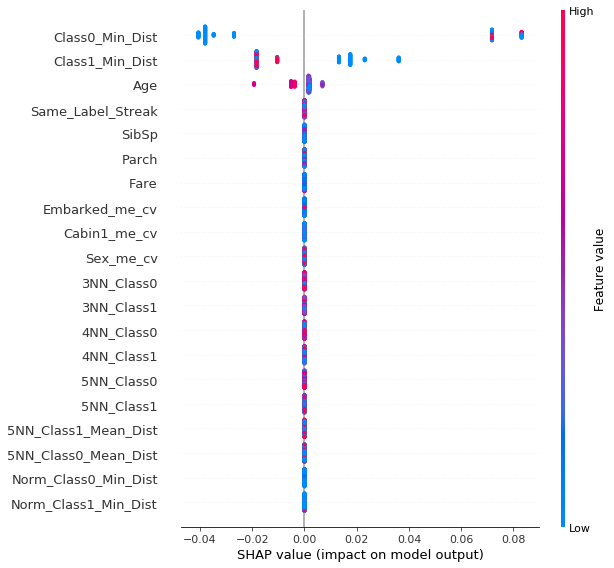

In [309]:
#A summary plot with the shapley value (feature importance) 
shap.summary_plot(shap_values, X_val)

# apply model on test set

In [327]:
X_test_MeanEnc_KnnFeats.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_me_cv,Cabin1_me_cv,Sex_me_cv,3NN_Class0,3NN_Class1,4NN_Class0,4NN_Class1,5NN_Class0,5NN_Class1,Same_Label_Streak,Class0_Min_Dist,Class1_Min_Dist,Norm_Class0_Min_Dist,Norm_Class1_Min_Dist,Dist_to_Neighbor_3,Norm_Dist_to_Neighbor_3,Dist_to_Neighbor_4,Norm_Dist_to_Neighbor_4,Dist_to_Neighbor_5,Norm_Dist_to_Neighbor_5,3NN_Class0_Mean_Dist,3NN_Class1_Mean_Dist,4NN_Class0_Mean_Dist,4NN_Class1_Mean_Dist,5NN_Class0_Mean_Dist,5NN_Class1_Mean_Dist
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,0.392867,NaN,0.189092,1.000000,0.000000,1.00,0.00,1.0,0.0,5.0,0.024066,999.000000,0.999958,999.000000,0.136093,5.654829,0.211221,8.776492,0.211221,8.776492,0.098751,999.000000,0.126868,999.000000,0.143739,999.000000
893,3,47.0,1,0,7.0000,0.336809,NaN,0.741332,1.000000,0.000000,0.75,0.25,0.6,0.4,3.0,0.060097,0.184585,0.999983,3.071384,0.152251,2.533369,0.184585,3.071384,0.222206,3.697384,0.096330,999.000000,0.096330,0.184585,0.096330,0.203395
894,2,62.0,0,0,9.6875,0.392867,NaN,0.189092,1.000000,0.000000,1.00,0.00,1.0,0.0,5.0,0.080530,999.000000,0.999988,999.000000,0.241016,2.992856,0.283242,3.517201,0.283242,3.517201,0.187521,999.000000,0.211451,999.000000,0.225809,999.000000
895,3,27.0,0,0,8.6625,0.336809,NaN,0.189092,1.000000,0.000000,1.00,0.00,1.0,0.0,5.0,0.026253,999.000000,0.999962,999.000000,0.026723,1.017851,0.028636,1.090723,0.028636,1.090723,0.026506,999.000000,0.027038,999.000000,0.027358,999.000000
896,3,22.0,1,1,12.2875,0.336809,NaN,0.741332,0.666667,0.333333,0.50,0.50,0.4,0.6,1.0,0.046749,0.176721,0.999979,3.780120,0.183111,3.916812,0.247558,5.295360,0.281799,6.027782,0.114930,0.176721,0.114930,0.212139,0.114930,0.235359


In [328]:
y_test_hat = random_tree.best_estimator_.predict(X_test_MeanEnc_KnnFeats)

In [329]:
y_test_output = pd.Series(y_test_hat, index=test.index, name = 'Survived')
pd.DataFrame(y_test_output).to_csv('Titanic_3_feat_gen_pred.csv')

In [331]:
y_test_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

apparently the model doesn't work due to knn features drastically overfitting